# Generate Caption from Image

In this project, we will create a model which will generate the caption of the image given.

<img src="https://3.bp.blogspot.com/-QfV7QzVq61Y/VGp6hTrMblI/AAAAAAAAAcY/qk3eCwbtpVs/s640/image01.png" style="width:100%">''

## Model Architecture:

### We will be using CNN and RNN to achieve our goal.
* CNN will be used to encode the image into a lower dimensional vector which consists of highly differentiative features. 
* RNN will be used to produce caption from the encoding of the image.

Note :- Section of code that will take too much time is commented. The result of these section of codes is saved after running it once. We are using those saved results.

# Setting Environment

## In this section, we have done the following things:
* Connected Colab to Google Drive, So that we can save our processed file in future sessions too.
* Defined some global variables to use them across the project.

## Conneting Colab to Google Drive for data persisitence

In [1]:
# Connecting to Google drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


## Defining some Global variables

In [0]:
project_directory = 'drive/My Drive/ml_data/'
image_directory = 'flickr8k_dataset/Flicker8k_Dataset/'
caption_directory = 'flickr8k_text/'
encoded_image_filename = project_directory + 'encoded_images.pkl'
caption_description_filename = project_directory + 'caption_descriptions.txt'
tokenizer_file = project_directory + 'tokenizer.pkl'

## Downloading Data (Run this only if image data is not present in google drive)

In [3]:
# Run this only if data is not downloaded 
# Running this cell will take some time

# Connecting to Google drive
from google.colab import drive
drive.mount('drive')

## Downloading and Extracting Data

# Downloading and saving files
! wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip -O Flickr8k_Dataset.zip
! wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip -O Flickr8k_text.zip

# Unzipping files 

! mkdir flickr8k_dataset
! mkdir flickr8k_text

! unzip -qq Flickr8k_text.zip -d flickr8k_text
! unzip -qq Flickr8k_Dataset.zip -d flickr8k_dataset

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
--2018-11-01 13:02:45--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115419746 (1.0G) [application/zip]
Saving to: ‘Flickr8k_Dataset.zip’

Flickr8k_Dataset.zi 100%[===================>]   1.04G  1.33MB/s    in 14m 53s 

2018-11-01 13:17:39 (1.19 MB/s) - ‘Flickr8k_Dataset.zip’ saved [1115419746/1115419746]

--2018-11-01 13:17:42--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

# Encoding images
In this section, we used the pre-trained InceptionV3 model for CNN encoder and extracted its last hidden layer as an encoding. After getting encodings, we saved them in a file for future uses.
<img src="https://4.bp.blogspot.com/-TMOLlkJBxms/Vt3HQXpE2cI/AAAAAAAAA8E/7X7XRFOY6Xo/s1600/image03.png" style="width:100%">

In [0]:
# # Codes in this cell will generate encoded_images.pkl
# # Run only if encoded_images.pkl is not present


# from os import listdir
# from pickle import dump
# from keras.applications import InceptionV3
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.applications.inception_v3 import preprocess_input
# from keras.models import Model

# # Encode all images and save it in the form of dictionary

# # Defining encoding model
# inception_model = InceptionV3(weights='imagenet')
# inception_model_input = inception_model.input
# inception_model_output = inception_model.layers[-2].output
# encoder_model= Model(inception_model_input, inception_model_output)

# encoded_image = dict()

# for each_image_name in listdir(image_directory):
#   # load an image from file
#   filename = image_directory + '/' + each_image_name
#   image = load_img(filename, target_size=(224, 224))
  
#   # convert the image pixels to a numpy array
#   image = img_to_array(image)
#   # reshape data for the model
#   image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  
#   # prepare the image for the InceptionV3 model
#   image = preprocess_input(image)
  
#   # get encoding
#   feature = encoder_model.predict(image)
  
#   # get image id
#   image_id = each_image_name.split('.')[0]
  
#   # store feature
#   encoded_image[image_id] = feature
    

# # save to file
# dump(encoded_image, open(encoded_image_filename, 'wb'))

# Extracting Captions
## In this section, we did the following things:
* Removed punctuations from captions.
* Converted all captions to lowercase.
* Saved all captions of images to a file in a usable format.

In [0]:
# import string

# # extract descriptions for images
# def load_descriptions(doc):
# 	mapping = dict()
# 	# process lines
# 	for line in doc.split('\n'):
# 		# split line by white space
# 		tokens = line.split()
# 		if len(line) < 2:
# 			continue
# 		# take the first token as the image id, the rest as the description
# 		image_id, image_desc = tokens[0], tokens[1:]
# 		# remove filename from image id
# 		image_id = image_id.split('.')[0]
# 		# convert description tokens back to string
# 		image_desc = ' '.join(image_desc)
# 		# create the list if needed
# 		if image_id not in mapping:
# 			mapping[image_id] = list()
# 		# store description
# 		mapping[image_id].append(image_desc)
# 	return mapping

# def clean_descriptions(descriptions):
# 	# prepare translation table for removing punctuation
# 	table = str.maketrans('', '', string.punctuation)
# 	for key, desc_list in descriptions.items():
# 		for i in range(len(desc_list)):
# 			desc = desc_list[i]
# 			# tokenize
# 			desc = desc.split()
# 			# convert to lower case
# 			desc = [word.lower() for word in desc]
# 			# remove punctuation from each token
# 			desc = [w.translate(table) for w in desc]
# 			# remove hanging 's' and 'a'
# 			desc = [word for word in desc if len(word)>1]
# 			# remove tokens with numbers in them
# 			desc = [word for word in desc if word.isalpha()]
# 			# store as string
# 			desc_list[i] =  ' '.join(desc)

# # convert the loaded descriptions into a vocabulary of words
# def to_vocabulary(descriptions):
# 	# build a list of all description strings
# 	all_desc = set()
# 	for key in descriptions.keys():
# 		[all_desc.update(d.split()) for d in descriptions[key]]
# 	return all_desc

# # save descriptions to file, one per line
# def save_descriptions(descriptions, filename):
# 	lines = list()
# 	for key, desc_list in descriptions.items():
# 		for desc in desc_list:
# 			lines.append(key + ' ' + desc)
# 	data = '\n'.join(lines)
# 	file = open(filename, 'w')
# 	file.write(data)
# 	file.close()

# filename = project_directory + 'flickr8k_text/Flickr8k.token.txt'
# # load descriptions
# doc = open(filename, 'r').read()
# # parse descriptions
# descriptions = load_descriptions(doc)
# print('Loaded: %d ' % len(descriptions))
# # clean descriptions
# clean_descriptions(descriptions)
# # summarize vocabulary
# vocabulary = to_vocabulary(descriptions)
# print('Vocabulary Size: %d' % len(vocabulary))
# # save to file
# save_descriptions(descriptions, caption_description_filename)

# Tokenizing Captions
## In this section, we did the following things:
* Created a tokenizer to convert words to integers.
* Saved tokenizer for future uses.

In [0]:
# # Creating and saving tokenizer

# from keras.preprocessing.text import Tokenizer
# from pickle import dump

# # load a pre-defined list of photo identifiers
# def load_set(filename):
# 	doc = open(filename, 'r').read()
# 	dataset = list()
# 	# process line by line
# 	for line in doc.split('\n'):
# 		# skip empty lines
# 		if len(line) < 1:
# 			continue
# 		# get the image identifier
# 		identifier = line.split('.')[0]
# 		dataset.append(identifier)
# 	return set(dataset)

# # load clean descriptions into memory
# def load_clean_descriptions(filename, dataset):
# 	# load document
# 	doc = open(filename, 'r').read()
# 	descriptions = dict()
# 	for line in doc.split('\n'):
# 		# split line by white space
# 		tokens = line.split()
# 		# split id from description
# 		image_id, image_desc = tokens[0], tokens[1:]
# 		# skip images not in the set
# 		if image_id in dataset:
# 			# create list
# 			if image_id not in descriptions:
# 				descriptions[image_id] = list()
# 			# wrap description in tokens
# 			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
# 			# store
# 			descriptions[image_id].append(desc)
# 	return descriptions

# # covert a dictionary of clean descriptions to a list of descriptions
# def to_lines(descriptions):
# 	all_desc = list()
# 	for key in descriptions.keys():
# 		[all_desc.append(d) for d in descriptions[key]]
# 	return all_desc

# # fit a tokenizer given caption descriptions
# def create_tokenizer(descriptions):
# 	lines = to_lines(descriptions)
# 	tokenizer = Tokenizer()
# 	tokenizer.fit_on_texts(lines)
# 	return tokenizer

# # load training dataset (6K)
# filename = project_directory + 'flickr8k_text/Flickr_8k.trainImages.txt'
# train = load_set(filename)
# print('Dataset: %d' % len(train))
# # descriptions
# train_descriptions = load_clean_descriptions(project_directory + 'caption_descriptions.txt', train)
# print('Descriptions: train=%d' % len(train_descriptions))
# # prepare tokenizer
# tokenizer = create_tokenizer(train_descriptions)
# # save the tokenizer
# dump(tokenizer, open(project_directory + 'tokenizer.pkl', 'wb'))

# Defining and Training Deep Learning Model

## In this section, we did the following things:
* Created an RNN decoder which will map our encoding to new captions.
* Trained RNN decoder using our training data.


## Training for 5 epochs

In [0]:
# from numpy import array
# from pickle import load
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Embedding
# from keras.layers import Dropout
# from keras.layers.merge import add
# from keras.callbacks import ModelCheckpoint

# # load doc into memory
# def load_doc(filename):
# 	# open the file as read only
# 	file = open(filename, 'r')
# 	# read all text
# 	text = file.read()
# 	# close the file
# 	file.close()
# 	return text

# # load a pre-defined list of photo identifiers
# def load_set(filename):
# 	doc = load_doc(filename)
# 	dataset = list()
# 	# process line by line
# 	for line in doc.split('\n'):
# 		# skip empty lines
# 		if len(line) < 1:
# 			continue
# 		# get the image identifier
# 		identifier = line.split('.')[0]
# 		dataset.append(identifier)
# 	return set(dataset)

# # load clean descriptions into memory
# def load_clean_descriptions(filename, dataset):
# 	# load document
# 	doc = load_doc(filename)
# 	descriptions = dict()
# 	for line in doc.split('\n'):
# 		# split line by white space
# 		tokens = line.split()
# 		# split id from description
# 		image_id, image_desc = tokens[0], tokens[1:]
# 		# skip images not in the set
# 		if image_id in dataset:
# 			# create list
# 			if image_id not in descriptions:
# 				descriptions[image_id] = list()
# 			# wrap description in tokens
# 			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
# 			# store
# 			descriptions[image_id].append(desc)
# 	return descriptions

# # load photo features
# def load_photo_features(filename, dataset):
# 	# load all features
# 	all_features = load(open(filename, 'rb'))
# 	# filter features
# 	features = {k: all_features[k] for k in dataset}
# 	return features

# # covert a dictionary of clean descriptions to a list of descriptions
# def to_lines(descriptions):
# 	all_desc = list()
# 	for key in descriptions.keys():
# 		[all_desc.append(d) for d in descriptions[key]]
# 	return all_desc

# # fit a tokenizer given caption descriptions
# def create_tokenizer(descriptions):
# 	lines = to_lines(descriptions)
# 	tokenizer = Tokenizer()
# 	tokenizer.fit_on_texts(lines)
# 	return tokenizer

# # calculate the length of the description with the most words
# def max_length(descriptions):
# 	lines = to_lines(descriptions)
# 	return max(len(d.split()) for d in lines)

# # create sequences of images, input sequences and output words for an image
# def create_sequences(tokenizer, max_length, desc_list, photo):
# 	X1, X2, y = list(), list(), list()
# 	# walk through each description for the image
# 	for desc in desc_list:
# 		# encode the sequence
# 		seq = tokenizer.texts_to_sequences([desc])[0]
# 		# split one sequence into multiple X,y pairs
# 		for i in range(1, len(seq)):
# 			# split into input and output pair
# 			in_seq, out_seq = seq[:i], seq[i]
# 			# pad input sequence
# 			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
# 			# encode output sequence
# 			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
# 			# store
# 			X1.append(photo)
# 			X2.append(in_seq)
# 			y.append(out_seq)
# 	return array(X1), array(X2), array(y)

# # define the captioning model
# def define_model(vocab_size, max_length):
# 	# feature extractor model
# 	inputs1 = Input(shape=(2048,))
# 	fe1 = Dropout(0.5)(inputs1)
# 	fe2 = Dense(256, activation='relu')(fe1)
# 	# sequence model
# 	inputs2 = Input(shape=(max_length,))
# 	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
# 	se2 = Dropout(0.5)(se1)
# 	se3 = LSTM(256)(se2)
# 	# decoder model
# 	decoder1 = add([fe2, se3])
# 	decoder2 = Dense(256, activation='relu')(decoder1)
# 	outputs = Dense(vocab_size, activation='softmax')(decoder2)
# 	# tie it together [image, seq] [word]
# 	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# 	# compile model
# 	model.compile(loss='categorical_crossentropy', optimizer='adam')
# 	# summarize model
# 	model.summary()
# 	return model

# # data generator, intended to be used in a call to model.fit_generator()
# def data_generator(descriptions, photos, tokenizer, max_length):
# 	# loop for ever over images
# 	while 1:
# 		for key, desc_list in descriptions.items():
# 			# retrieve the photo feature
# 			photo = photos[key][0]
# 			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo)
# 			yield [[in_img, in_seq], out_word]

# # load training dataset (6K)
# filename = project_directory + 'flickr8k_text/Flickr_8k.trainImages.txt'
# train = load_set(filename)
# print('Dataset: %d' % len(train))
# # descriptions
# train_descriptions = load_clean_descriptions(project_directory + 'caption_descriptions.txt', train)
# print('Descriptions: train=%d' % len(train_descriptions))
# # photo features
# train_features = load_photo_features(project_directory + 'encoded_images.pkl', train)
# print('Photos: train=%d' % len(train_features))
# # prepare tokenizer
# tokenizer = create_tokenizer(train_descriptions)
# vocab_size = len(tokenizer.word_index) + 1
# print('Vocabulary Size: %d' % vocab_size)
# # determine the maximum sequence length
# max_length = max_length(train_descriptions)
# print('Description Length: %d' % max_length)

# # define the model
# model = define_model(vocab_size, max_length)
# # train the model, run epochs manually and save after each epoch
# epochs = 5
# steps = len(train_descriptions)
# for i in range(epochs):
# 	# create the data generator
# 	generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
# 	# fit for one epoch
# 	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
# 	# save model
# 	model.save(project_directory + 'model_' + str(i) + '.h5')

## Training Further for 10 epochs

In [0]:
# # Training Further

# from pickle import load
# from numpy import argmax
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from keras.models import load_model

# trained_till = 4

# # load the model
# model = load_model(project_directory + 'model_' + str(trained_till) + '.h5')

# epochs = 10
# steps = len(train_descriptions)
# for i in range(trained_till + 1,trained_till + 1 +epochs):
# 	# create the data generator
# 	generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
# 	# fit for one epoch
# 	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
# 	# save model
# 	model.save(project_directory + 'model_' + str(i) + '.h5')

# Generating New Captions
## In this section, we did the following things:
* Generated new captions for test images.
* Generated new captions for images not present in this dataset.

## For images in testing set

In [0]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input
from keras.applications import InceptionV3

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# extract features from each photo in the directory
def extract_features(filename):
  # Defining encoding model
  inception_model = InceptionV3(weights='imagenet')
  inception_model_input = inception_model.input
  inception_model_output = inception_model.layers[-2].output
  encoder_model= Model(inception_model_input, inception_model_output)
  # load the photo
  image = load_img(filename, target_size=(224, 224))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)
  # get features
  feature = encoder_model.predict(image, verbose=0)
  return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return ' '.join(in_text.split()[1:-1])

# load the tokenizer
tokenizer = load(open(project_directory + 'tokenizer.pkl', 'rb'))
# loader feature_extractor
feature_extractor = load(open(project_directory + 'encoded_images.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model(project_directory + 'model_14.h5')

In [0]:
# Extracting some images from testing set
test_list = []
with open(caption_directory + 'Flickr_8k.testImages.txt','r') as f:
  test_list = f.read().split()
test_list = [x.split('.')[0] for x in test_list]

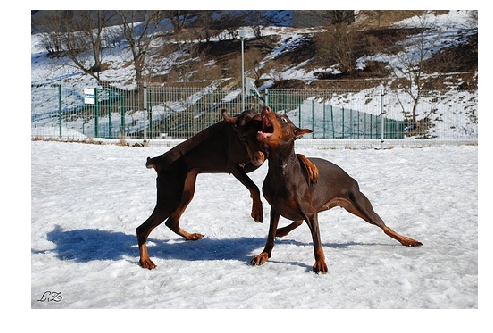

0 two dogs are playing in the grass


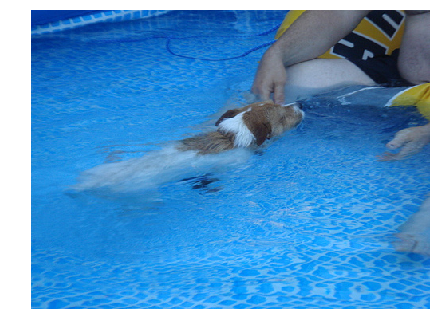

1 dog is running through the grass


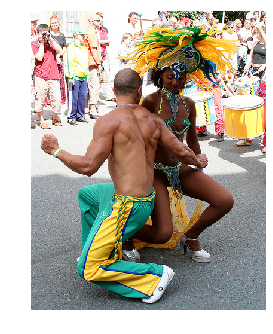

2 man in red shirt and glasses is standing on tripod in front of the camera


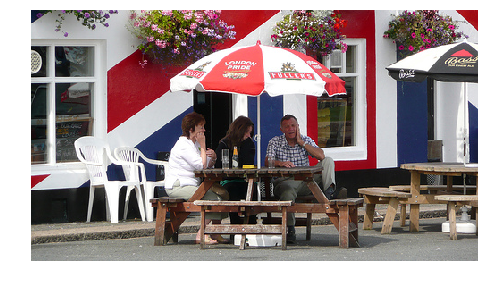

3 man in blue shirt and hat stands in front of the camera


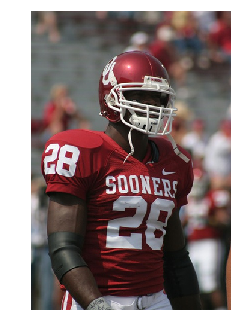

4 two girls are playing on bed


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(5):
  image_name = test_list[i]
  # load and prepare the photograph
  photo = feature_extractor[image_name]
  # View image 
  image = mpimg.imread(image_directory + image_name + '.jpg')
  plt.axis("off")
  plt.imshow(image)
  plt.show()
  # generate description
  description = generate_desc(model, tokenizer, photo, max_length)
  print(i,description)
  

## Good Captions

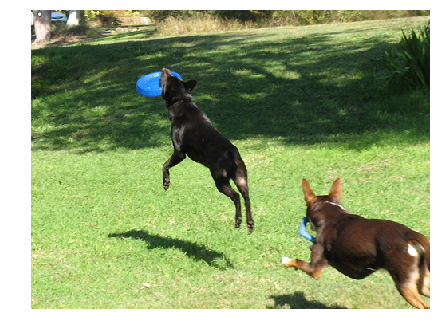

16 two dogs are playing in the grass


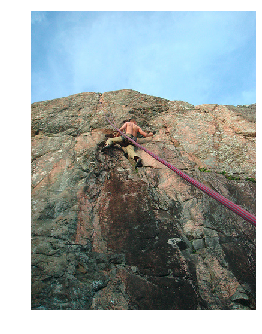

28 man is climbing up rock face


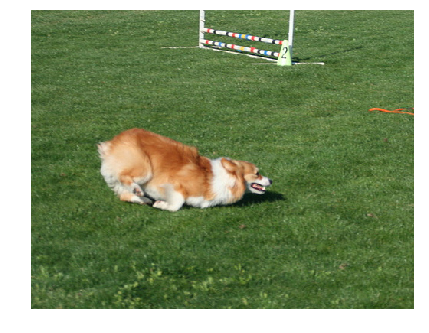

37 dog is running through the grass


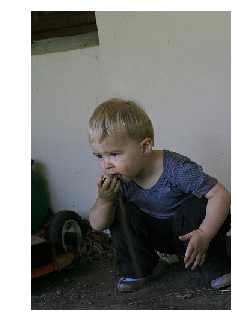

40 young boy is playing with toy in the grass


In [22]:
good_caption_list = [16, 28, 37, 40]
                     
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in good_caption_list:
  image_name = test_list[i]
  # load and prepare the photograph
  photo = feature_extractor[image_name]
  # View image 
  image = mpimg.imread(image_directory + image_name + '.jpg')
  plt.axis("off")
  plt.imshow(image)
  plt.show()
  # generate description
  description = generate_desc(model, tokenizer, photo, max_length)
  print(i,description)
  

## Bad Captions

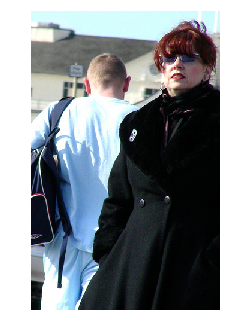

29 man in blue shirt and hat stands in front of the camera


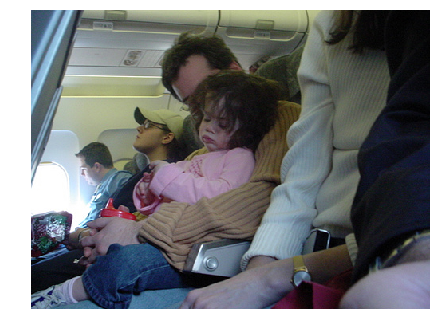

42 man and woman are standing outside of bus


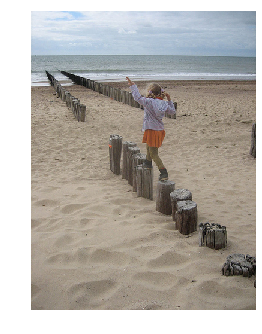

49 man is climbing up rock face


In [30]:
bad_caption_list = [29, 42, 49]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in bad_caption_list:
  image_name = test_list[i]
  # load and prepare the photograph
  photo = feature_extractor[image_name]
  # View image 
  image = mpimg.imread(image_directory + image_name + '.jpg')
  plt.axis("off")
  plt.imshow(image)
  plt.show()
  # generate description
  description = generate_desc(model, tokenizer, photo, max_length)
  print(i,description)

## For other images

In [0]:
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def caption_generator(image_url):
  # Getting image
  urllib.request.urlretrieve(image_url, 'test_image.jpg')  

  # Generating caption
  photo = extract_features('test_image.jpg')
  # Displaying image
  image = mpimg.imread("test_image.jpg")
  plt.axis("off")
  plt.imshow(image)
  plt.show()
  # generate description
  description = generate_desc(model, tokenizer, photo, max_length)
  print(description)
  
  

96116736/96112376 [==============================] - 7s 0us/step


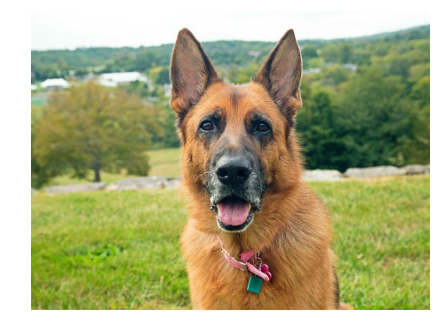

dog is running through the grass


In [25]:
caption_generator('http://cdn.akc.org/content/article-body-image/housetrain_adult_dog_hero.jpg')

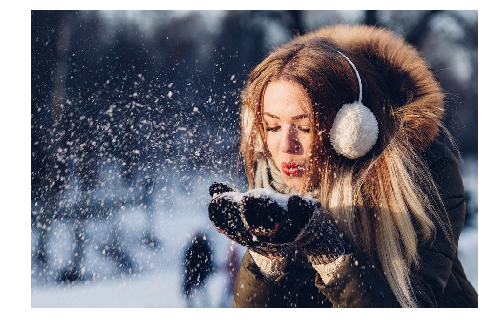

man is climbing up rock face


In [26]:
caption_generator('https://cdn.pixabay.com/photo/2017/08/06/15/14/people-2593377_960_720.jpg')

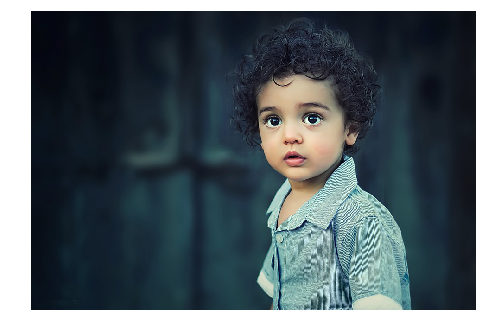

two children are playing on bed


In [27]:
caption_generator('https://cdn.pixabay.com/photo/2015/06/22/08/40/child-817373_960_720.jpg')

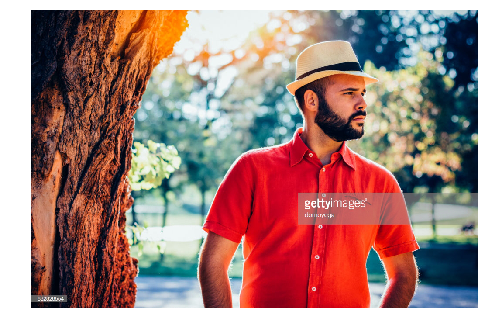

man in black shirt and hat stands in front of bus


In [28]:
caption_generator('https://media.gettyimages.com/photos/handsome-young-man-in-the-red-shirt-on-a-sunny-day-picture-id682828554')